In [ ]:
#Importing the libraries
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
#Loading the Data
df = pd.read_csv('TSLA (3).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400
1,2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200
2,2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500
3,2021-02-04,855.000000,856.500000,833.419983,849.989990,849.989990,15812700
4,2021-02-05,845.000000,864.770020,838.969971,852.229980,852.229980,18566600
...,...,...,...,...,...,...,...
247,2022-01-24,904.760010,933.510010,851.469971,930.000000,930.000000,50791700
248,2022-01-25,914.200012,951.260010,903.210022,918.400024,918.400024,28865300
249,2022-01-26,952.429993,987.690002,906.000000,937.409973,937.409973,34955800
250,2022-01-27,933.359985,935.390015,829.000000,829.099976,829.099976,48475400


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,794.907222,811.385434,775.877938,793.962300,793.962300,2.697961e+07
std,174.545259,180.204608,167.605102,173.987670,173.987670,1.144500e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,669.937500,683.922501,651.927506,668.027497,668.027497,1.882452e+07
50%,724.930023,740.679993,712.069976,730.539978,730.539978,2.465930e+07
75%,914.342514,936.417511,891.567520,920.530014,920.530014,3.224438e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


In [ ]:
df.min()

Date         2021-02-01
Open         552.549988
High         566.210022
Low           539.48999
Close             563.0
Adj Close         563.0
Volume          9800600
dtype: object

In [ ]:
df.max()


Date          2022-01-28
Open         1234.410034
High          1243.48999
Low               1217.0
Close        1229.910034
Adj Close    1229.910034
Volume          89396500
dtype: object

In [ ]:
#Data Visualisation with Plotly
px.area(df, x='Date', y='Close')

In [ ]:
px.line(df, x='Date', y='Close')

In [ ]:
px.bar(df, x='Date', y='Close')

In [ ]:
px.area(df, x='Date', y='Volume')

In [ ]:
df['Volume'].max()

89396500

In [ ]:
df['Volume'].min()

9800600

In [ ]:
df['Volume'].median()

24659300.0

In [ ]:
px.bar(df, x='Date', y='Volume')

In [ ]:
px.box(df, y='Close')

In [ ]:
#Data Preparation
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,814.289978,842.000000,795.559998,839.809998,839.809998,25391400
1,2021-02-02,844.679993,880.500000,842.200012,872.789978,872.789978,24346200
2,2021-02-03,877.020020,878.080017,853.059998,854.690002,854.690002,18343500
3,2021-02-04,855.000000,856.500000,833.419983,849.989990,849.989990,15812700
4,2021-02-05,845.000000,864.770020,838.969971,852.229980,852.229980,18566600
...,...,...,...,...,...,...,...
247,2022-01-24,904.760010,933.510010,851.469971,930.000000,930.000000,50791700
248,2022-01-25,914.200012,951.260010,903.210022,918.400024,918.400024,28865300
249,2022-01-26,952.429993,987.690002,906.000000,937.409973,937.409973,34955800
250,2022-01-27,933.359985,935.390015,829.000000,829.099976,829.099976,48475400


In [ ]:
columns= ['Date', 'Close']

In [ ]:
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close' : 'y'})

In [ ]:
prophet_df

,ds,y
0,2021-02-01,839.809998
1,2021-02-02,872.789978
2,2021-02-03,854.690002
3,2021-02-04,849.989990
4,2021-02-05,852.229980
...,...,...
247,2022-01-24,930.000000
248,2022-01-25,918.400024
249,2022-01-26,937.409973
250,2022-01-27,829.099976


In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Forecsting


In [ ]:
future=m.make_future_dataframe(periods=15)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-01,782.929516,691.077009,858.293294,782.929516,782.929516,-6.387451,-6.387451,-6.387451,-6.387451,-6.387451,-6.387451,0.0,0.0,0.0,776.542065
1,2021-02-02,781.435768,692.922915,857.107468,781.435768,781.435768,-9.018981,-9.018981,-9.018981,-9.018981,-9.018981,-9.018981,0.0,0.0,0.0,772.416788
2,2021-02-03,779.942021,687.051333,849.535313,779.942021,779.942021,-7.575995,-7.575995,-7.575995,-7.575995,-7.575995,-7.575995,0.0,0.0,0.0,772.366026
3,2021-02-04,778.448274,685.566498,844.488473,778.448274,778.448274,-15.273555,-15.273555,-15.273555,-15.273555,-15.273555,-15.273555,0.0,0.0,0.0,763.174718
4,2021-02-05,776.954526,679.296205,848.455234,776.954526,776.954526,-15.830038,-15.830038,-15.830038,-15.830038,-15.830038,-15.830038,0.0,0.0,0.0,761.124489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-02-23,1028.022313,934.338466,1103.846854,1014.683672,1041.913102,-7.575995,-7.575995,-7.575995,-7.575995,-7.575995,-7.575995,0.0,0.0,0.0,1020.446319
278,2022-02-24,1027.815772,933.986142,1096.187510,1013.670530,1042.469155,-15.273555,-15.273555,-15.273555,-15.273555,-15.273555,-15.273555,0.0,0.0,0.0,1012.542217
279,2022-02-25,1027.609232,926.496892,1095.376087,1012.696246,1043.154841,-15.830038,-15.830038,-15.830038,-15.830038,-15.830038,-15.830038,0.0,0.0,0.0,1011.779194
280,2022-02-26,1027.402691,969.578249,1138.443741,1012.198263,1043.921509,27.043010,27.043010,27.043010,27.043010,27.043010,27.043010,0.0,0.0,0.0,1054.445700


In [ ]:
px.line(forecast, x='ds', y='yhat')

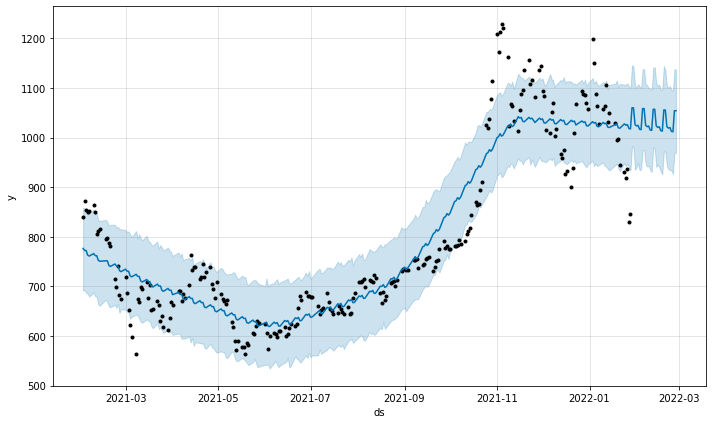

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

In [ ]:
px.area(forecast, x='ds', y='yhat')

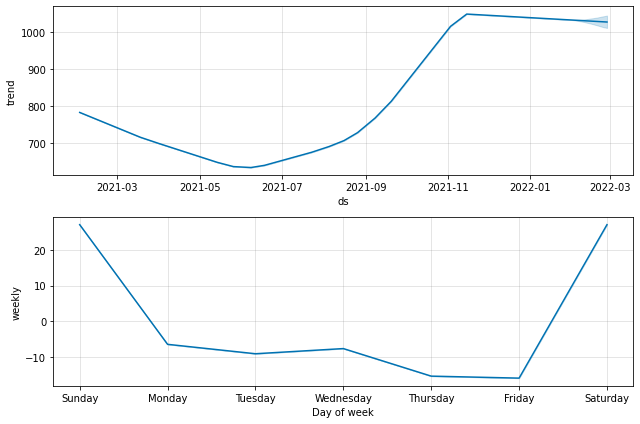

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
#downloading the forecast data
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>